# Aug ??th, 2022 (Degree: 0 --> NaN)

**Motivation**:  <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Fig dir

In [2]:
nn = 512
perc = 15
fig_dir = 'Fig7_Degree'
fig_dir = pjoin(fig_base_dir, 'paper2.0', f'n{nn}-p{perc}', fig_dir)
os.makedirs(fig_dir, exist_ok=True)
print(fig_dir)

kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 300,
}

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/paper2.0/n512-p15/Fig7_Degree

## Prepare (512)

In [3]:
num_k = 7
mice = Mice(nn)
bt_dict, props_bo, props_ca = default_props(mice, num_k, perc)
bt = BootStrap(**props_ca)
pal = prepare_palette()

## Degree

In [4]:
for mode, o in bt_dict.items():
    o.run_deg = np.array(o.run_deg)
    o.run_deg[o.run_deg == 0] = np.nan

In [5]:
%%time

cut, se, bins, xs = cut4figs('deg', bt_dict, bt.get_booter(int(1e5)))
len(xs), len(bins)

CPU times: user 7.32 s, sys: 45.8 ms, total: 7.37 s
Wall time: 7.37 s


(69, 70)

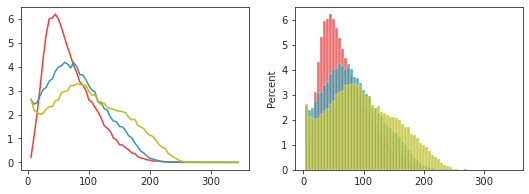

In [6]:
fig, axes = create_figure(1, 2, (9, 3))
for mode, o in bt_dict.items():
    axes[0].plot(xs, avg(cut[mode], 1), color=pal[mode])
    sns.histplot(
        data=o.run_deg[np.isfinite(o.run_deg)],
        bins=bins,
        stat='percent',
        color=pal[mode],
        ax=axes[1],
    )

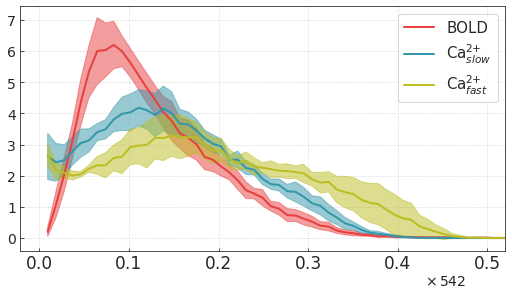

In [7]:
from figures.fig_deg import dist_deg as go
fig, _ = go(cut, se, xs, True, norm=len(bt.n2l))

fig.savefig(pjoin(fig_dir, 'dist.pdf'), **kws_fig)
fig.savefig(pjoin(fig_dir, 'dist.png'), **kws_fig)

In [8]:
deg = {
    mode: avg(o.run_deg, 1) for
    mode, o in bt_dict.items()
}

In [9]:
{k: (np.round(np.nanmin(v)), np.round(np.nanmax(v))) for k, v in deg.items()}

{
    'BOLD': (26.0, 118.0),
    'Ca$^{2\\!\\!+}_{slow}$': (17.0, 159.0),
    'Ca$^{2\\!\\!+}_{fast}$': (1.0, 198.0)
}

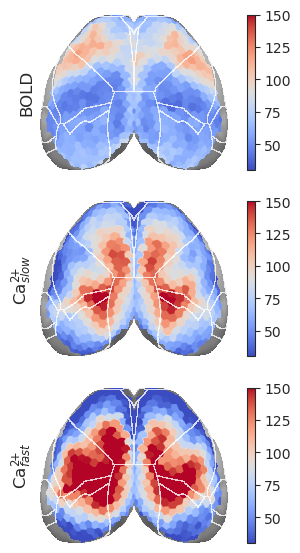

In [10]:
_ = bt.show(
    data=deg,
    figsize=(5, 7),
    vmin=30,
    vmax=150,
    add_disjoint=False,
    cmap='coolwarm',
    cbar=True,
)

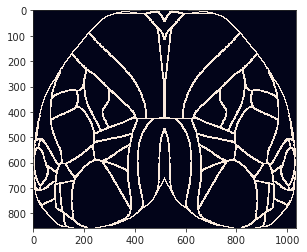

In [11]:
contour = bt.get_contour(0.2, False)
plt.imshow(contour);

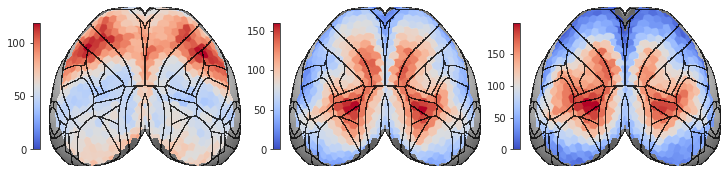

In [12]:
fig, axes = create_figure(1, 3, (10, 3), tight_layout=False, constrained_layout=True)
for ax, (mode, x) in zip(axes.flat, deg.items()):
    x[x == 0] = np.nan
    
    if mode == BOLD:
        vmin = 0
        nbins = 4
    elif mode == CAS:
        vmin = 0
        nbins = 6
    elif mode == CAF:
        vmin = 0
        nbins = 6
    else:
        raise NotImplementedError
    vmax = np.nanmax(x)
    
    ax, cbar = ctx2ax(
        x=x,
        ax=ax,
        base=bt,
        vmin=vmin,
        vmax=vmax,
        cmap='coolwarm',
        cbar_shrink=0.6,
        contour=contour,
        contour_cmap='Greys_r',
        cbar_tick_nbins=nbins,
        cbar_aspect=20,
    )
remove_ticks(axes)

fig.savefig(pjoin(fig_dir, 'ctx.png'), **kws_fig)

plt.show()

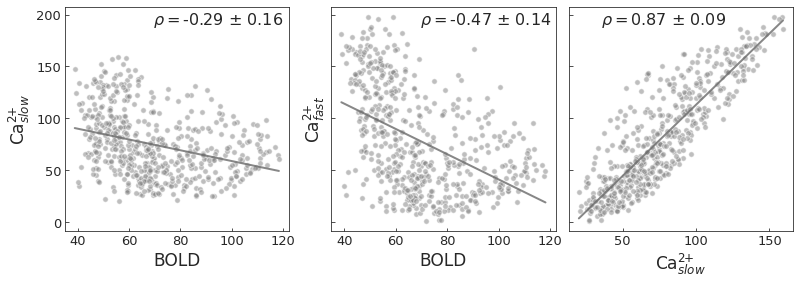

In [13]:
fig, _ = pairwise_lite('deg', bt_dict, git_good('deg', bt_dict), int(1e3))

fig.savefig(pjoin(fig_dir, 'pw.pdf'), **kws_fig)
fig.savefig(pjoin(fig_dir, 'pw.png'), **kws_fig)